In [146]:
import pandas as pd
import seaborn as sns
import pingouin as pg
import sys
from PIL import Image
from matplotlib import pyplot as plt

In [155]:
df = pd.read_csv('automation_issue.csv', index_col=None)

In [156]:
df.head(5)

item_id               created_at                dt_review        lat  \
0        1  2025-01-01 05:29:02.528  2025-01-09 00:00:00.000  33.685112   
1        2  2025-01-01 05:29:29.857  2025-01-03 00:00:00.000  42.627964   
2        3  2025-01-01 05:29:33.868  2025-01-03 00:00:00.000  42.290970   
3        4  2025-01-01 05:34:26.032  2025-01-03 00:00:00.000  34.137737   
4        5  2025-01-01 05:34:55.099  2025-01-03 00:00:00.000  34.044273   

          lon                                       current_tags  \
0 -117.918490  [platform:android, LA, auto:navigation_stopped...   
1  -83.467125  [platform:android, auto:driver-arrived, auto:b...   
2  -83.233810  [auto:build-production, onboarding, DT, Hard_t...   
3 -118.459720  [LA, platform:android, Hard_to Evaluate, onboa...   
4 -118.447044  [auto:navigation_stopped, Hard_to Evaluate, pl...   

  RP_distance_auto arrival_backdoor_auto destination_search_unit_type reason  \
0              NaN                   NaN                          poi  other   
1              NaN                   NaN                          NaN  other   
2              NaN                   NaN                      address  other   
3              NaN                   NaN                          NaN  other   
4              NaN                   NaN                          NaN  other   

   ... original_estimated_duration real_duration gps_trace_duration  \
0  ...                  162.187000       130.959            129.665   
1  ...                  361.367367       576.872            284.294   
2  ...                  361.053316       639.445            356.013   
3  ...                  362.909554        24.234             23.261   
4  ...                  362.106800       219.172            218.840   

  reroute_count request_coordinates destination_search_result_point_rang  \
0             0                 NaN                                  1.0   
1             0                 NaN                                  0.0   
2             0                 NaN                                  NaN   
3             0                 NaN                                  2.0   
4             0                 NaN                                  2.0   

  end_location_deviation_angle routable_point_to_search_road_distance  \
0                    10.377738                                  4.664   
1                    12.700334                                    NaN   
2                   158.465910                                  0.054   
3                    98.938900                                    NaN   
4                   159.880040                                    NaN   

   distance_to_reach_destination_by_road backdoor  
0                                288.752      NaN  
1                                    NaN      NaN  
2                               1269.405      NaN  
3                                    NaN      NaN  
4                                    NaN      NaN  

[5 rows x 41 columns]

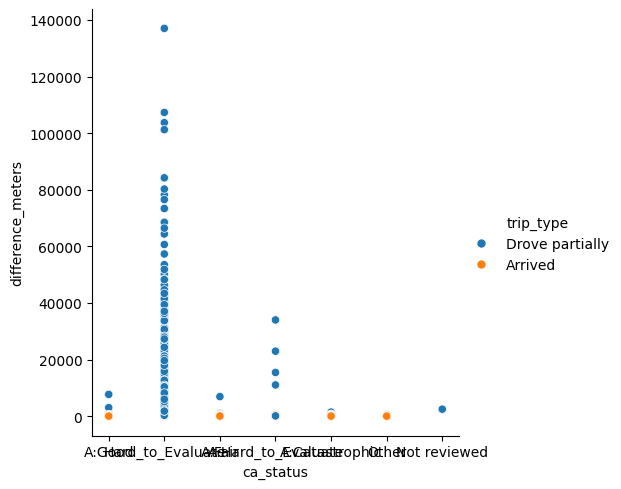

In [157]:
sns.relplot(
    data=data_auto,
    x="ca_status", y="difference_meters", hue="trip_type",
);

In [158]:
pg.pairwise_corr(df.drop(columns='ca_status'))

X  \
0                                   item_id   
1                                   item_id   
2                                   item_id   
3                                   item_id   
4                                   item_id   
..                                      ...   
115    destination_search_result_point_rang   
116    destination_search_result_point_rang   
117            end_location_deviation_angle   
118            end_location_deviation_angle   
119  routable_point_to_search_road_distance   

                                          Y   method alternative     n  \
0                                       lat  pearson   two-sided  9013   
1                                       lon  pearson   two-sided  9013   
2                         difference_meters  pearson   two-sided  9008   
3       destination_search_result_point_lat  pearson   two-sided  9013   
4       destination_search_result_point_lon  pearson   two-sided  9013   
..                                      ...      ...         ...   ...   
115  routable_point_to_search_road_distance  pearson   two-sided  2213   
116   distance_to_reach_destination_by_road  pearson   two-sided  2213   
117  routable_point_to_search_road_distance  pearson   two-sided  5406   
118   distance_to_reach_destination_by_road  pearson   two-sided  5406   
119   distance_to_reach_destination_by_road  pearson   two-sided  5454   

            r           CI95%          p-unc        BF10     power  
0   -0.251712  [-0.27, -0.23]  2.792306e-130  1.476e+126  1.000000  
1   -0.010718   [-0.03, 0.01]   3.089441e-01       0.022  0.174421  
2    0.038244    [0.02, 0.06]   2.828072e-04       9.604  0.952651  
3   -0.251712  [-0.27, -0.23]  2.791409e-130  1.477e+126  1.000000  
4   -0.010678   [-0.03, 0.01]   3.107594e-01       0.022  0.173466  
..        ...             ...            ...         ...       ...  
115 -0.018007   [-0.06, 0.02]   3.971631e-01       0.038  0.135311  
116 -0.020559   [-0.06, 0.02]   3.336898e-01       0.042  0.162024  
117  0.009385   [-0.02, 0.04]   4.902805e-01       0.022  0.106052  
118  0.162485    [0.14, 0.19]   2.656405e-33   4.145e+29  1.000000  
119  0.007381   [-0.02, 0.03]   5.857799e-01        0.02  0.084657  

[120 rows x 10 columns]

In [159]:
data_auto.drop(columns='ca_status').rcorr(decimals=3)

item_id     lat     lon  \
item_id                                      -     ***           
lat                                     -0.252       -     ***   
lon                                     -0.011   0.431       -   
difference_meters                        0.038  -0.062  -0.055   
rn                                       0.077   0.007    0.02   
destination_search_result_point_lat     -0.252     1.0   0.431   
destination_search_result_point_lon     -0.011   0.431     1.0   
search_events_count                      0.035  -0.001  -0.023   
auto_nav_feedback                          nan     nan     nan   
difference_from_reroute                  0.038  -0.061  -0.054   
original_estimated_duration              0.045  -0.031  -0.041   
real_duration                            0.016    0.01   0.019   
gps_trace_duration                      -0.011   -0.01   0.013   
reroute_count                           -0.022  -0.029  -0.013   
destination_search_result_point_rang     0.019  -0.047  -0.053   
end_location_deviation_angle            -0.027   0.025  -0.013   
routable_point_to_search_road_distance    -0.0   0.033   0.046   
distance_to_reach_destination_by_road    0.041  -0.068  -0.049   

                                       difference_meters      rn  \
item_id                                              ***     ***   
lat                                                  ***           
lon                                                  ***           
difference_meters                                      -           
rn                                                -0.011       -   
destination_search_result_point_lat               -0.062   0.007   
destination_search_result_point_lon               -0.055    0.02   
search_events_count                                  0.0   0.001   
auto_nav_feedback                                    nan     nan   
difference_from_reroute                            0.998  -0.011   
original_estimated_duration                        0.136   0.008   
real_duration                                     -0.158   0.012   
gps_trace_duration                                -0.371   0.006   
reroute_count                                     -0.017   0.013   
destination_search_result_point_rang              -0.006  -0.007   
end_location_deviation_angle                       0.137   0.007   
routable_point_to_search_road_distance            -0.002   -0.03   
distance_to_reach_destination_by_road              0.989  -0.017   

                                       destination_search_result_point_lat  \
item_id                                                                ***   
lat                                                                    ***   
lon                                                                    ***   
difference_meters                                                      ***   
rn                                                                           
destination_search_result_point_lat                                      -   
destination_search_result_point_lon                                  0.431   
search_events_count                                                 -0.001   
auto_nav_feedback                                                      nan   
difference_from_reroute                                             -0.061   
original_estimated_duration                                         -0.031   
real_duration                                                         0.01   
gps_trace_duration                                                  -0.009   
reroute_count                                                       -0.029   
destination_search_result_point_rang                                -0.047   
end_location_deviation_angle                                         0.025   
routable_point_to_search_road_distance                               0.033   
distance_to_reach_destination_by_road                               -0.069   

        

In [160]:
df['destination_search_unit_type'] = pd.factorize(df['destination_search_unit_type'])[0]+1
df['reason'] = pd.factorize(df['reason'])[0]+1
df['routable_point'] = pd.factorize(df['routable_point'])[0]+1
df['feature_type'] = pd.factorize(df['feature_type'])[0]+1
# df['ca_status'] = pd.factorize(df['ca_status'])[0]+1
df['tag_group'] = pd.factorize(df['tag_group'])[0]+1
df['issue'] = pd.factorize(df['issue'])[0]+1
df['related_nav_feedbacks'] = pd.factorize(df['related_nav_feedbacks'])[0]+1
df['destination_search_result_point_accuracy_type'] = pd.factorize(df['destination_search_result_point_accuracy_type'])[0]+1
df['finish_tag'] = pd.factorize(df['finish_tag'])[0]+1
df['trip_type'] = pd.factorize(df['trip_type'])[0]+1
df['RP'] = pd.factorize(df['RP'])[0]+1

df.head(5)

item_id               created_at                dt_review        lat  \
0        1  2025-01-01 05:29:02.528  2025-01-09 00:00:00.000  33.685112   
1        2  2025-01-01 05:29:29.857  2025-01-03 00:00:00.000  42.627964   
2        3  2025-01-01 05:29:33.868  2025-01-03 00:00:00.000  42.290970   
3        4  2025-01-01 05:34:26.032  2025-01-03 00:00:00.000  34.137737   
4        5  2025-01-01 05:34:55.099  2025-01-03 00:00:00.000  34.044273   

          lon                                       current_tags  \
0 -117.918490  [platform:android, LA, auto:navigation_stopped...   
1  -83.467125  [platform:android, auto:driver-arrived, auto:b...   
2  -83.233810  [auto:build-production, onboarding, DT, Hard_t...   
3 -118.459720  [LA, platform:android, Hard_to Evaluate, onboa...   
4 -118.447044  [auto:navigation_stopped, Hard_to Evaluate, pl...   

  RP_distance_auto arrival_backdoor_auto  destination_search_unit_type  \
0              NaN                   NaN                             1   
1              NaN                   NaN                             0   
2              NaN                   NaN                             2   
3              NaN                   NaN                             0   
4              NaN                   NaN                             0   

   reason  ...  original_estimated_duration  real_duration gps_trace_duration  \
0       1  ...                   162.187000        130.959            129.665   
1       1  ...                   361.367367        576.872            284.294   
2       1  ...                   361.053316        639.445            356.013   
3       1  ...                   362.909554         24.234             23.261   
4       1  ...                   362.106800        219.172            218.840   

  reroute_count  request_coordinates  destination_search_result_point_rang  \
0             0                  NaN                                   1.0   
1             0                  NaN                                   0.0   
2             0                  NaN                                   NaN   
3             0                  NaN                                   2.0   
4             0                  NaN                                   2.0   

   end_location_deviation_angle routable_point_to_search_road_distance  \
0                     10.377738                                  4.664   
1                     12.700334                                    NaN   
2                    158.465910                                  0.054   
3                     98.938900                                    NaN   
4                    159.880040                                    NaN   

   distance_to_reach_destination_by_road  backdoor  
0                                288.752       NaN  
1                                    NaN       NaN  
2                               1269.405       NaN  
3                                    NaN       NaN  
4                                    NaN       NaN  

[5 rows x 41 columns]

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   item_id                                        9013 non-null   int64  
 1   created_at                                     9013 non-null   object 
 2   dt_review                                      9013 non-null   object 
 3   lat                                            9013 non-null   float64
 4   lon                                            9013 non-null   float64
 5   current_tags                                   9013 non-null   object 
 6   RP_distance_auto                               383 non-null    object 
 7   arrival_backdoor_auto                          2446 non-null   object 
 8   destination_search_unit_type                   9013 non-null   int64  
 9   reason                                         9013 

In [162]:
df1 = pd.get_dummies(df['RP_distance_auto'])

df = pd.concat([df, df1], axis=1).reindex(df.index)

df.drop('RP_distance_auto', axis=1, inplace=True)


df1 = pd.get_dummies(df['arrival_backdoor_auto'])

df = pd.concat([df, df1], axis=1).reindex(df.index)

df.drop('arrival_backdoor_auto', axis=1, inplace=True)


# df1 = pd.get_dummies(df['RP'])

# df = pd.concat([df, df1], axis=1).reindex(df.index)

# df.drop('RP', axis=1, inplace=True)


df1 = pd.get_dummies(df['auto_good_tag'])

df = pd.concat([df, df1], axis=1).reindex(df.index)

df.drop('auto_good_tag', axis=1, inplace=True)


df1 = pd.get_dummies(df['request_coordinates'])

df = pd.concat([df, df1], axis=1).reindex(df.index)

df.drop('request_coordinates', axis=1, inplace=True)


df1 = pd.get_dummies(df['backdoor'])

df = pd.concat([df, df1], axis=1).reindex(df.index)

df.drop('backdoor', axis=1, inplace=True)



df.head(5)

item_id               created_at                dt_review        lat  \
0        1  2025-01-01 05:29:02.528  2025-01-09 00:00:00.000  33.685112   
1        2  2025-01-01 05:29:29.857  2025-01-03 00:00:00.000  42.627964   
2        3  2025-01-01 05:29:33.868  2025-01-03 00:00:00.000  42.290970   
3        4  2025-01-01 05:34:26.032  2025-01-03 00:00:00.000  34.137737   
4        5  2025-01-01 05:34:55.099  2025-01-03 00:00:00.000  34.044273   

          lon                                       current_tags  \
0 -117.918490  [platform:android, LA, auto:navigation_stopped...   
1  -83.467125  [platform:android, auto:driver-arrived, auto:b...   
2  -83.233810  [auto:build-production, onboarding, DT, Hard_t...   
3 -118.459720  [LA, platform:android, Hard_to Evaluate, onboa...   
4 -118.447044  [auto:navigation_stopped, Hard_to Evaluate, pl...   

   destination_search_unit_type  reason  routable_point  feature_type  ...  \
0                             1       1               1             1  ...   
1                             0       1               1             2  ...   
2                             2       1               1             0  ...   
3                             0       1               1             0  ...   
4                             0       1               1             0  ...   

  reroute_count destination_search_result_point_rang  \
0             0                                  1.0   
1             0                                  0.0   
2             0                                  NaN   
3             0                                  2.0   
4             0                                  2.0   

   end_location_deviation_angle  routable_point_to_search_road_distance  \
0                     10.377738                                   4.664   
1                     12.700334                                     NaN   
2                    158.465910                                   0.054   
3                     98.938900                                     NaN   
4                    159.880040                                     NaN   

   distance_to_reach_destination_by_road  RP_distance>50m  \
0                                288.752            False   
1                                    NaN            False   
2                               1269.405            False   
3                                    NaN            False   
4                                    NaN            False   

   possible_bad_backdoor Auto_triage_good not_coordinate  possible_backdoor  
0                  False            False          False              False  
1                  False            False          False              False  
2                  False            False          False              False  
3                  False            False          False              False  
4                  False            False          False              False  

[5 rows x 41 columns]

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9013 entries, 0 to 9012
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   item_id                                        9013 non-null   int64  
 1   created_at                                     9013 non-null   object 
 2   dt_review                                      9013 non-null   object 
 3   lat                                            9013 non-null   float64
 4   lon                                            9013 non-null   float64
 5   current_tags                                   9013 non-null   object 
 6   destination_search_unit_type                   9013 non-null   int64  
 7   reason                                         9013 non-null   int64  
 8   routable_point                                 9013 non-null   int64  
 9   feature_type                                   9013 

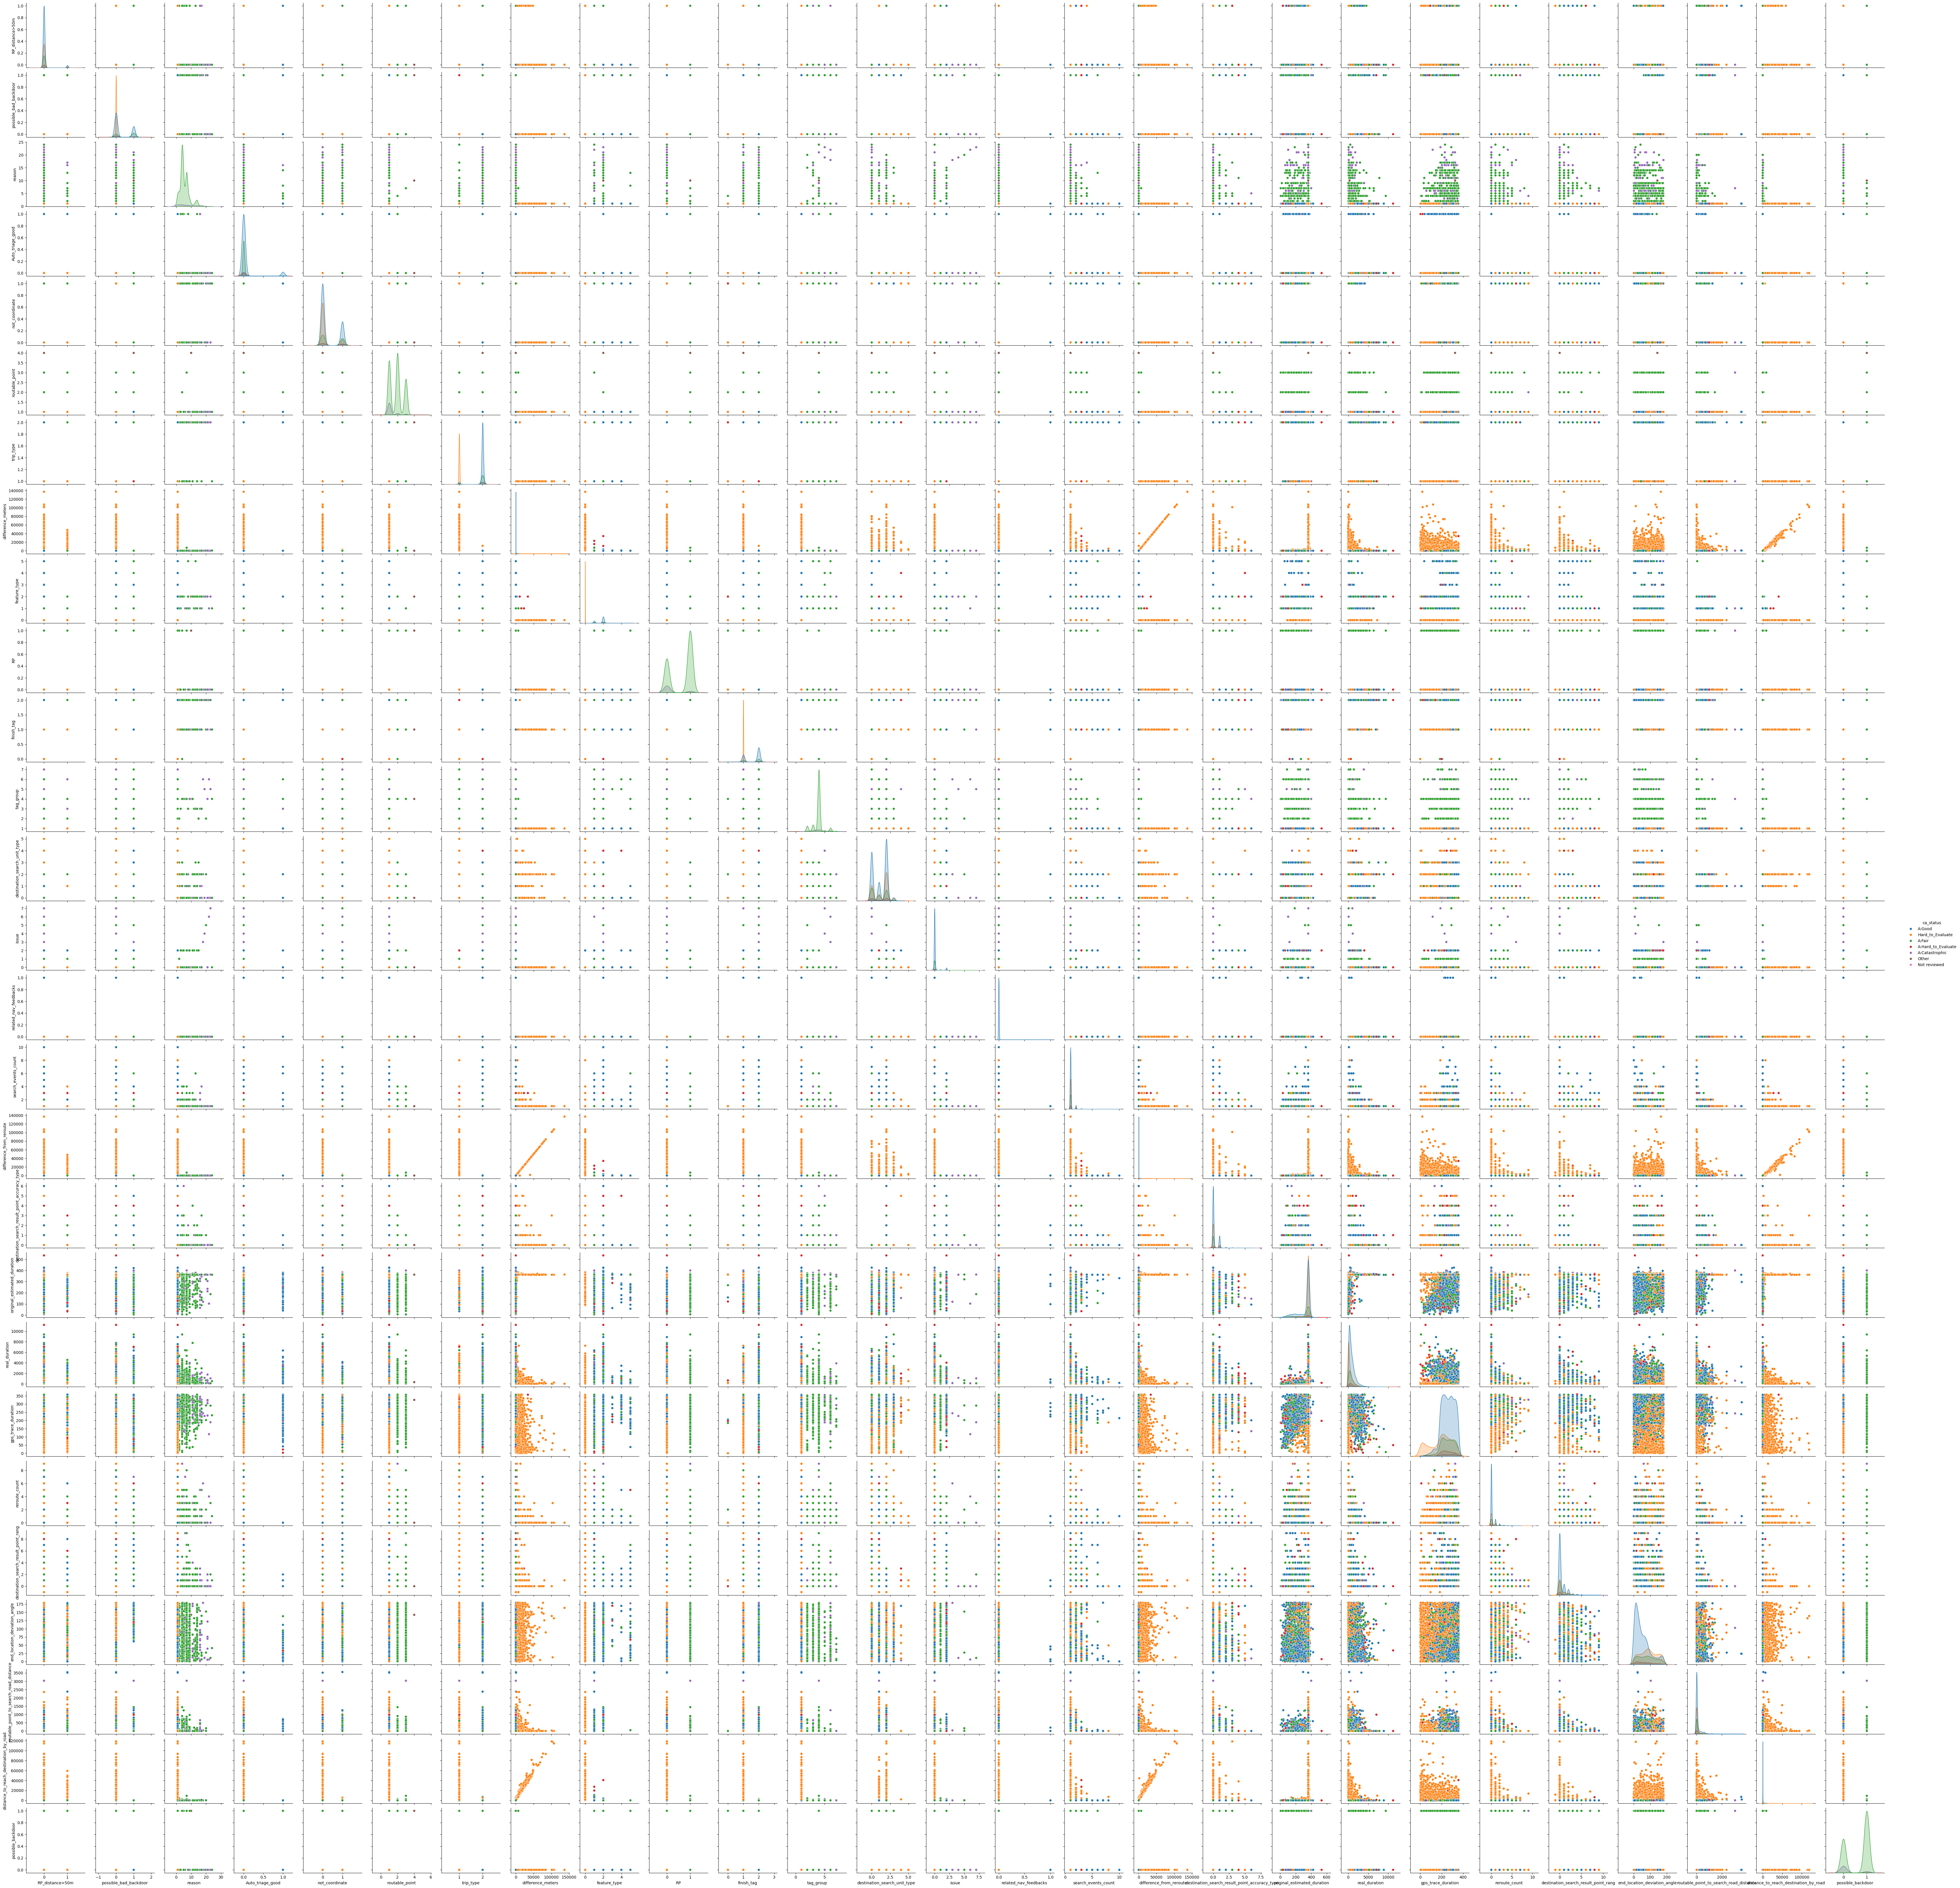

In [169]:
img_png = sns.pairplot(df, hue='ca_status', vars = ['RP_distance>50m', 'possible_bad_backdoor', 'reason', 'Auto_triage_good',
                       'not_coordinate', 'routable_point', 'trip_type',  'difference_meters', 'feature_type', 'RP', 'finish_tag', 
                       'tag_group', 'destination_search_unit_type', 'issue',
                       'related_nav_feedbacks', 'search_events_count', 'difference_from_reroute', 'destination_search_result_point_accuracy_type',
                       'original_estimated_duration', 'real_duration', 'gps_trace_duration', 'reroute_count', 
                       'destination_search_result_point_rang', 'end_location_deviation_angle', 'routable_point_to_search_road_distance',
                       'distance_to_reach_destination_by_road', 'possible_backdoor']);

# x_vars=None, y_vars=None

In [171]:
img_png.savefig('output.png')

In [172]:
df['ca_status_index'] = pd.factorize(df['ca_status'])[0]+1

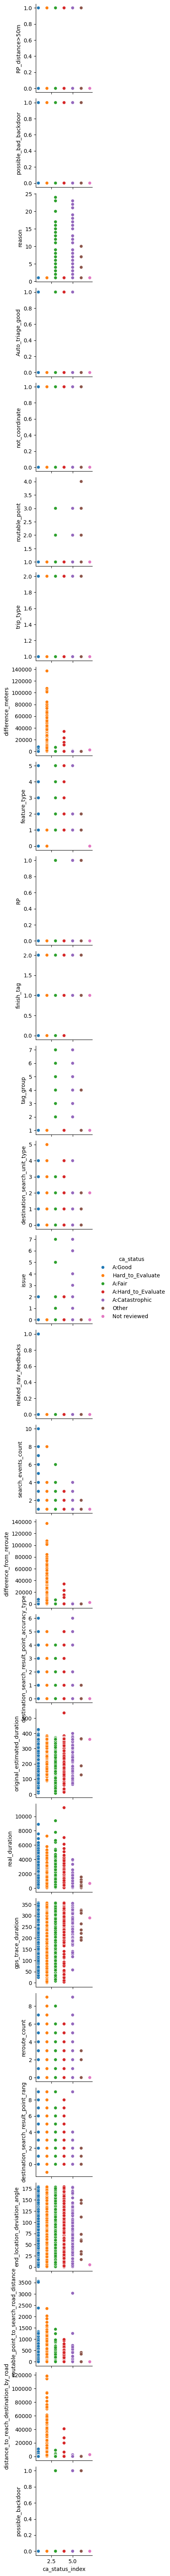

In [176]:
img2_png = sns.pairplot(df, hue='ca_status', x_vars = ['ca_status_index'],
                        y_vars = ['RP_distance>50m', 'possible_bad_backdoor', 'reason', 'Auto_triage_good',
                       'not_coordinate', 'routable_point', 'trip_type',  'difference_meters', 'feature_type', 'RP', 'finish_tag', 
                       'tag_group', 'destination_search_unit_type', 'issue',
                       'related_nav_feedbacks', 'search_events_count', 'difference_from_reroute', 'destination_search_result_point_accuracy_type',
                       'original_estimated_duration', 'real_duration', 'gps_trace_duration', 'reroute_count', 
                       'destination_search_result_point_rang', 'end_location_deviation_angle', 'routable_point_to_search_road_distance',
                       'distance_to_reach_destination_by_road', 'possible_backdoor']);

In [174]:
img2_png.savefig('output2.png')